## Convolutional Neural Network dan foydalanilgan holda model o'qitish

#### CIFAR-10 datasetini train va test datalarga ajratilgan holatda yuklab olamiz

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#### Train datasetidagi bir nechta rasmlarni visual ko'rinishda chiqaramiz

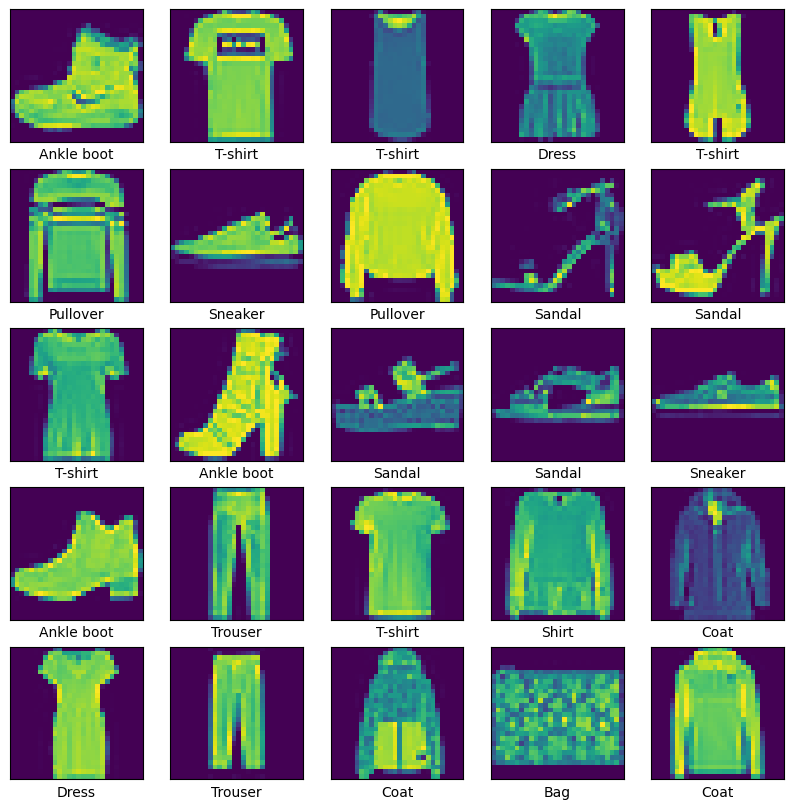

In [2]:
import matplotlib.pyplot as plt
classlar = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(classlar[y_train[i]])
plt.show()

#### Train va Test data larning shape larini  tekshiramiz

In [3]:
print(f"x train shape:{x_train.shape}")
print(f"y train shape:{y_train.shape}")
print(f"x test shape:{x_test.shape}")
print(f"y test shape:{y_test.shape}")

x train shape:(60000, 28, 28)
y train shape:(60000,)
x test shape:(10000, 28, 28)
y test shape:(10000,)


#### One hot encoder funksiyasini yozib olamiz

In [4]:
import numpy as np

def one_hot_encoder(class_number,label_size):
    label = np.zeros(label_size)
    label[class_number] = 1
    return label

#### Train va Test uchun input data larni normallashtirib olamiz

In [5]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

#### Train va Test uchun input data larni shape larini CNN uchun moslab olamiz 

In [6]:
x_train.reshape(x_train.shape[0],28,28,1)
x_test.reshape(x_test.shape[0],28,28,1)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

#### Train va Test uchun chiquvchi data larni label holatidan one hot encode holatiga o'tkazib olamiz

In [7]:
y_train = np.array([one_hot_encoder(class_number,10) for class_number in y_train])
y_test = np.array([one_hot_encoder(class_number,10) for class_number in y_test])

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

#### Model o'qitish uchun kerakli modullarni chaqirib olamiz

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

#### Model arxitekturasini ishlab chiqamiz

In [10]:
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation=tf.keras.activations.relu, input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation=tf.keras.activations.relu),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation=tf.keras.activations.relu),
    Conv2D(128, (3, 3), activation=tf.keras.activations.relu),
    Dropout(0.1),
    Flatten(),
    Dense(256, activation=tf.keras.activations.relu),
    Dropout(0.2),
    Dense(128, activation=tf.keras.activations.relu),
    Dropout(0.2),
    Dense(64, activation=tf.keras.activations.relu),
    Dropout(0.2),
    Dense(32, activation=tf.keras.activations.relu),
    Dense(10, activation=tf.keras.activations.softmax)
])

#### Model qurishda foydalaniladigan weight va bias parametrlarini umumiy soni va har bir qatlamdagi sonini tekshirib olamiz

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 dropout (Dropout)           (None, 8, 8, 128)         0         
                                                        

#### Parametrlarni sozlash va Loss aniqlash uchun kerakli metodlarni parametr sifatida ko'rsatib qo'yamiz

In [12]:
# Shunchaki ishlatish
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=tf.keras.metrics.CategoricalAccuracy())

#### Forward hisoblash jarayoni 

In [13]:
train_test_history = model.fit(x_train, y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 43s 89ms/step - loss: 0.7134 - categorical_accuracy: 0.7357 - val_loss: 0.4260 - val_categorical_accuracy: 0.8444
Epoch 2/10
469/469 [==============================] - 41s 88ms/step - loss: 0.3858 - categorical_accuracy: 0.8641 - val_loss: 0.3201 - val_categorical_accuracy: 0.8839
Epoch 3/10
469/469 [==============================] - 41s 88ms/step - loss: 0.3067 - categorical_accuracy: 0.8927 - val_loss: 0.2925 - val_categorical_accuracy: 0.8938
Epoch 4/10
469/469 [==============================] - 41s 88ms/step - loss: 0.2652 - categorical_accuracy: 0.9060 - val_loss: 0.2874 - val_categorical_accuracy: 0.8990
Epoch 5/10
469/469 [==============================] - 41s 88ms/step - loss: 0.2388 - categorical_accuracy: 0.9148 - val_loss: 0.2524 - val_categorical_accuracy: 0.9083
Epoch 6/10
469/469 [==============================] - 45s 95ms/step - loss: 0.2170 - categorical_accuracy: 0.9222 - val_loss: 0.2448 - val_categorical_accuracy:

#### Test uchun datalarni sinovdan o'tkazish

In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2501 - categorical_accuracy: 0.9171


[0.25011906027793884, 0.9171000123023987]

#### Train va Test uchun loss hamda accuracy larni grafigini chiqaramiz 

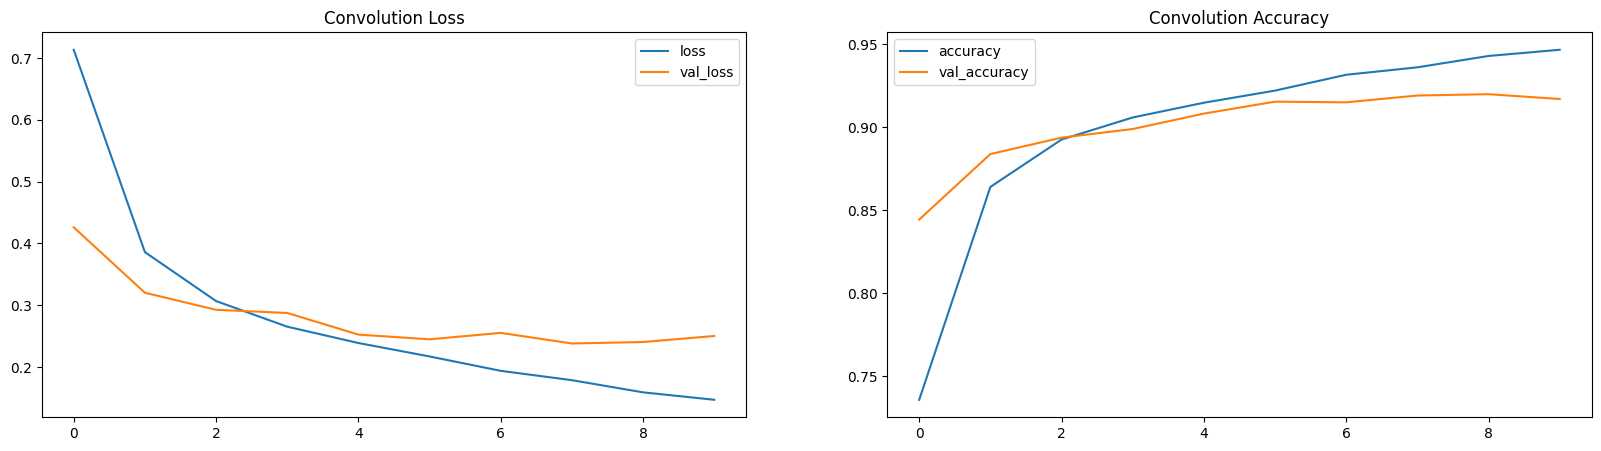

In [15]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title("Convolution Loss")
plt.plot(train_test_history.history["loss"], label="loss")
plt.plot(train_test_history.history["val_loss"], label="val_loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Convolution Accuracy")
plt.plot(train_test_history.history["categorical_accuracy"], label="accuracy")
plt.plot(train_test_history.history["val_categorical_accuracy"], label="val_accuracy")
plt.legend()

plt.show()

#### Modelni saqlash

In [16]:
model.save('model.h5')